## OneBharat P3-Churn Modelling Data (P3- Churn-Modelling Data.xlsx)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('P3- Churn-Modelling Data.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Customer Demographics: 

Q1. What is the distribution of customers across different age groups?

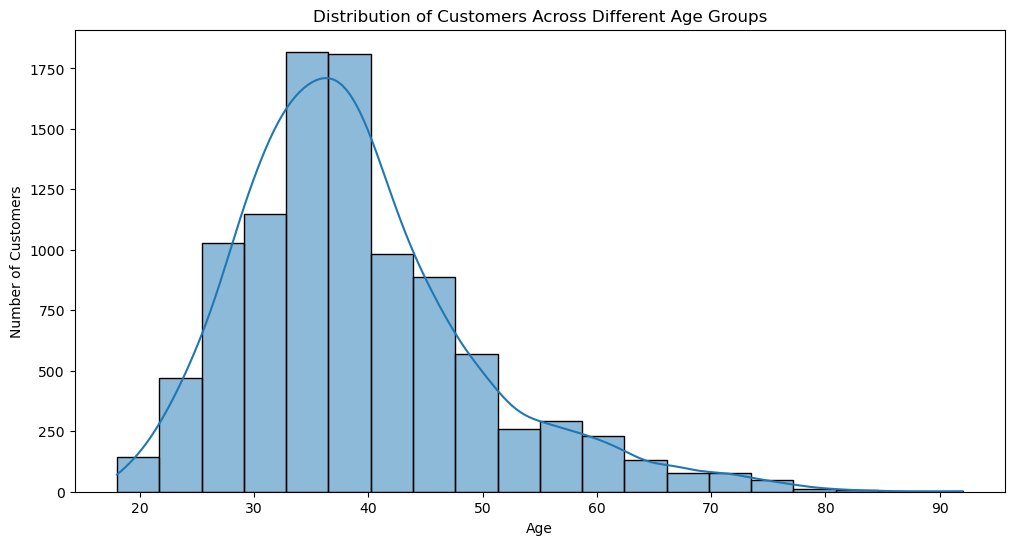

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of customers across different age groups
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20,kde = True)
plt.title('Distribution of Customers Across Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

Q2 .Analyze the gender distribution of customers.

In [11]:
gender_distribution = df['Gender'].value_counts()

# Display the result
print(gender_distribution)

Male      5457
Female    4543
Name: Gender, dtype: int64


#### Churn Analysis: 

Q2. What are main reasons for churn?

<Axes: >

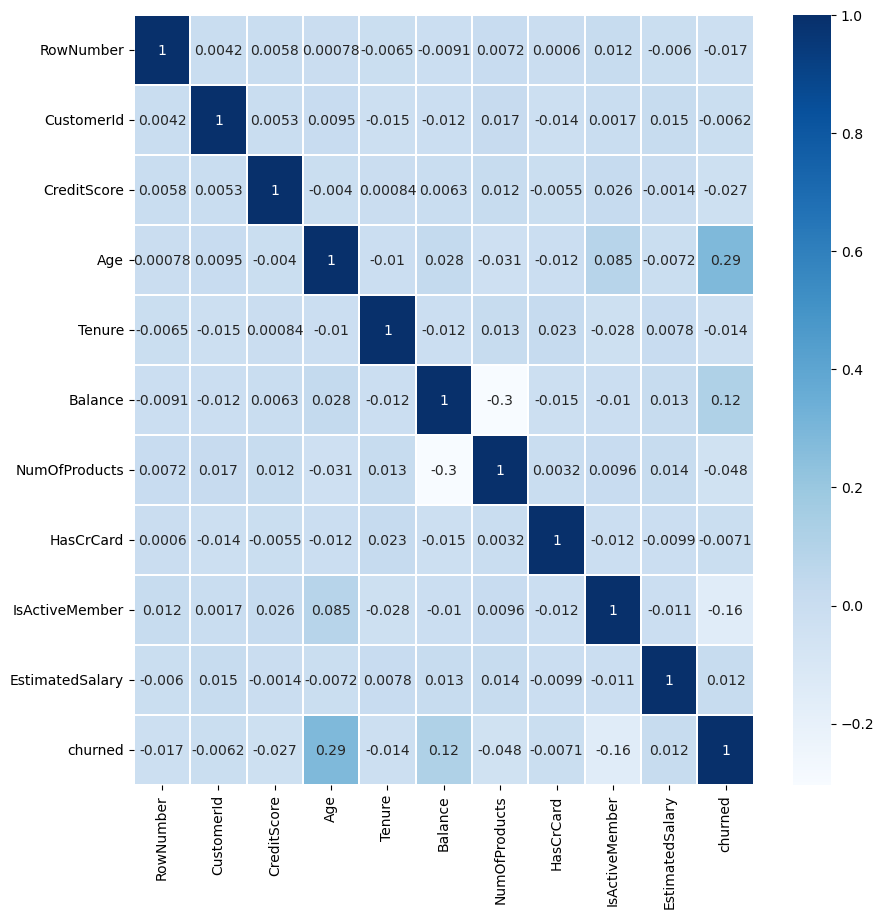

In [27]:
import seaborn as sns
from sklearn import datasets
#matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(matrix, cmap="Blues", annot=True,linewidths=.3)

Age has a moderate positive correlation with churn.
IsActiveMember has a negative correlation with churn, suggesting that active members are less likely to churn.
Balance and NumOfProducts show low correlation with churn, indicating these might be less influential.

In [6]:
products = df['NumOfProducts'].value_counts()
print(products)

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


#### Financial Analysis

Q1. What is the average account balance of customers?

In [7]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

Predictive Modelling

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

data = pd.read_csv('P3- Churn-Modelling Data.csv')

# Encoding the categorical variables
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Feature selection
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'churned'], axis=1)
y = data['churned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
model_eval= classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(model_eval)
#print(roc_auc)
#print(feature_importance)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.77      0.47      0.59       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500



In [12]:
print(roc_auc)
print(feature_importance)

0.8559575124235176
           Feature  Importance
3              Age    0.237583
9  EstimatedSalary    0.147786
0      CreditScore    0.143376
5          Balance    0.141006
6    NumOfProducts    0.132399
4           Tenure    0.081921
8   IsActiveMember    0.040288
1        Geography    0.037281
2           Gender    0.019526
7        HasCrCard    0.018835
